# Final Project: Vehicle Rounting Problem

In [2]:
import numpy as np
#np.set_printoptions(threshold=np.nan)
import seaborn as sns
from matplotlib import pyplot as plt
import math
import copy
import random

## 1. Import und Data Investigation

In [59]:
# VRP1
# import distance matrix
filepath = 'VRP1/distance.txt'
with open(filepath, 'r') as t:
    distance_matrix = []
    for line in t.readlines():
        y = [int(value) for value in line.split()]
        distance_matrix.append(y)
        
    t.close()
    #distance_matrix = np.array(distance_matrix)

# import demand matrix
filepath = 'VRP1/demand.txt'
with open(filepath, 'r') as t:
    demand_matrix = []
    for line in t.readlines():
        y = [int(value) for value in line.split()]
        demand_matrix.append(y)
        
    t.close()
    #demand_matrix = np.array(demand_matrix)

# import capacity matrix
filepath = 'VRP1/capacity.txt'
with open(filepath, 'r') as t:
    capacity_matrix = []
    for line in t.readlines():
        y = [int(value) for value in line.split()]
        capacity_matrix.append(y)
        
    t.close()
    #capacity_matrix = np.array(capacity_matrix)

# import transportation_cost matrix
filepath = 'VRP1/transportation_cost.txt'
with open(filepath, 'r') as t:
    transportation_cost = []
    for line in t.readlines():
        y = [int(value) for value in line.split()]
        transportation_cost.append(y)
        
    t.close()

# VRP2
# import distance matrix
filepath = 'VRP2/distance.txt'
with open(filepath, 'r') as t:
    distance_matrix_2 = []
    for line in t.readlines():
        y = [int(value) for value in line.split()]
        distance_matrix_2.append(y)
        
    t.close()
    #distance_matrix_2 = np.array(distance_matrix_2)

# import demand matrix
filepath = 'VRP2/demand.txt'
with open(filepath, 'r') as t:
    demand_matrix_2 = []
    for line in t.readlines():
        y = [int(value) for value in line.split()]
        demand_matrix_2.append(y)
        
    t.close()
    #demand_matrix_2 = np.array(demand_matrix)

# import capacity matrix
filepath = 'VRP2/capacity.txt'
with open(filepath, 'r') as t:
    capacity_matrix_2 = []
    for line in t.readlines():
        y = [int(value) for value in line.split()]
        capacity_matrix_2.append(y)
        
    t.close()
    #capacity_matrix_2 = np.array(capacity_matrix)

# import transportation_cost matrix
filepath = 'VRP1/transportation_cost.txt'
with open(filepath, 'r') as t:
    transportation_cost = []
    for line in t.readlines():
        y = [int(value) for value in line.split()]
        transportation_cost.append(y)
        
    t.close()

In [10]:
# information about the distance matrix for VRP1
print("Information about distance matric for VRP1 \n# columns: ", len(distance_matrix[0]))
print("# lines: ", len(distance_matrix))
asymmetric = (distance_matrix != np.transpose(distance_matrix))
print(np.unique(asymmetric))
print("Since we also get False values while comparing the matrix with its transposed, the matrix is asymmetric. \n")

# information about the distance matrix for VRP2
print("Information about distance matric for VRP2 \n# columns: ", len(distance_matrix_2[0]))
print("# lines: ", len(distance_matrix_2))
asymmetric_2 = (distance_matrix_2 != np.transpose(distance_matrix_2))
                
print(np.unique(asymmetric_2))
print("Since we also get False values while comparing the matrix with its transposed, the matrix is asymmetric.")

Information about distance matric for VRP1 
# columns:  101
# lines:  101
[False  True]
Since we also get False values while comparing the matrix with its transposed, the matrix is asymmetric. 

Information about distance matric for VRP2 
# columns:  101
# lines:  101
[False  True]
Since we also get False values while comparing the matrix with its transposed, the matrix is asymmetric.


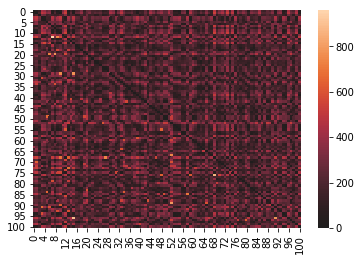

In [11]:
#heatmap
ax = sns.heatmap(distance_matrix, center=0)

The heatmap again illustrates the fact that we have to deal with an asymmetric distance matrix. In order to apply the k-means algorithm, we need a symmetric matrix. Therefore we need to make our distances symmetric be taking the mean between the distances (if they are different). 

In [12]:
# WE DO NOT NEED A SYMMETRIC MATRIX ANYMORE!!! #

# CASE 1: distance_matrix 
cleaned_distance_matrix = np.copy(distance_matrix)
#for i in range(len(asymmetric)):
#    for j in range(i+1, len(asymmetric[0])):
#        if asymmetric[i,j]:
#            cleaned_distance = (distance_matrix[i,j] + distance_matrix[j,i]) // 2
#            cleaned_distance_matrix[i,j] = cleaned_distance
#            cleaned_distance_matrix[j,i] = cleaned_distance
            
# CASE 2: distance_matrix_2 
cleaned_distance_matrix_2 = np.copy(distance_matrix_2)
#for i in range(len(asymmetric_2)):
#    for j in range(i+1, len(asymmetric_2[0])):
#        if asymmetric_2[i,j]:
#            cleaned_distance = (distance_matrix_2[i,j] + distance_matrix_2[j,i]) // 2
#            cleaned_distance_matrix_2[i,j] = cleaned_distance
#            cleaned_distance_matrix_2[j,i] = cleaned_distance

In [13]:
# Demand matrix has 100 entries
demand_matrix = demand_matrix[0]
print(demand_matrix)

# Depot has a demand of 0
demand_matrix = [0] + demand_matrix
print(demand_matrix)

# Note that the matrix is 101x101, i.e. that the depot is set at (0)
print(cleaned_distance_matrix)

capacity_matrix = capacity_matrix[0]
print(capacity_matrix)

[24, 21, 11, 28, 21, 20, 13, 12, 27, 27, 24, 22, 14, 22, 14, 16, 25, 28, 11, 22, 23, 18, 23, 18, 15, 22, 12, 17, 13, 12, 23, 28, 26, 14, 29, 11, 29, 19, 23, 11, 15, 27, 19, 23, 22, 29, 12, 13, 28, 14, 14, 23, 11, 14, 22, 23, 17, 25, 23, 15, 13, 20, 29, 21, 28, 21, 24, 27, 10, 21, 11, 27, 28, 10, 16, 23, 27, 10, 23, 16, 17, 23, 14, 28, 29, 16, 20, 10, 18, 12, 14, 18, 15, 10, 11, 14, 28, 10, 20, 21]
[0, 24, 21, 11, 28, 21, 20, 13, 12, 27, 27, 24, 22, 14, 22, 14, 16, 25, 28, 11, 22, 23, 18, 23, 18, 15, 22, 12, 17, 13, 12, 23, 28, 26, 14, 29, 11, 29, 19, 23, 11, 15, 27, 19, 23, 22, 29, 12, 13, 28, 14, 14, 23, 11, 14, 22, 23, 17, 25, 23, 15, 13, 20, 29, 21, 28, 21, 24, 27, 10, 21, 11, 27, 28, 10, 16, 23, 27, 10, 23, 16, 17, 23, 14, 28, 29, 16, 20, 10, 18, 12, 14, 18, 15, 10, 11, 14, 28, 10, 20, 21]
[[  0  58 126 ... 196 406  36]
 [ 58   0 184 ... 254 464  42]
 [126 184   0 ...  70 280 142]
 ...
 [196 254  70 ...   0 210 212]
 [406 464 280 ... 210   0 422]
 [ 36  42 142 ... 212 422   0]]
[10

## Algorithm

1. Clean matrix, i.e. make the matrix symmetric. Take mean of two different values.
2. K-means clustering to 100-demand-clusters. See Vanessa's paper how to do it. 
3. Look at one 100 cluster and calculate the demand distance ratio: $:= \dfrac{demand}{distance \cdot cost}$ Merge the 100 cluster with the nearest one, calculate new ratio and save it. Calculate new center point. Merge this cluster with the next nearest and calculate ratio, save it, etc. Do this until you reached a demand of 1000. Then Merge the first cluster with the ones that give the best ratio. Go to the next cluster, that hasn't been merged yet and do the same until no more clusters have not been merged or checked. 
4. Apply nature inspired algorithm.


Last idea: 
1. Clean matrix, i.e. make the matrix symmetric. Take mean of two different values.
2. K-means clustering to 100-demand-clusters. See Vanessa's paper how to do it. 
3. Merging: first calculate the demand-distance-ratio for the existing 100-demand-clusters. Then merge 3 100-demand-clusters with K-means clustering into one (do that until all are merged). Calculate demand-distance-ratio of the 300-clusters as well. Note that **demand-distance-ratio** $:= \dfrac{demand}{distance \cdot cost}$
4. Merge all 100-demand-clusters into 500-demand-clusters. Calculate demand-distance-ratio. 
5. Merge all 100-demand-clusters into 1000-demand-clusters. Calculate demand-distance-ratio.
6. Choose cluster with best ratio (smallest value) and mark the customers as final. Check if all customers are marked final. 
7. If not check if we still have all types of cars available. Recalculate the clusters for all non-final clusters for all available car types (repeat step 3-5).

**REMEMBER:** do not hard code parameters, name them 

## 2. Clustering

In [29]:
# input: distance matrix (use cleaned_distance_matrix and cleaned_distance_matrix_2) and geometrical representation
# of the customers (from point 2), demand_matrix, capacity_matrix

# output: (cluster x customer)-matrix that consists only of 0 and 1 (1 means that the customer is part of the cluster)
# The size of the (cluster x customer)-matrix is approx. 19 x 100
# output: a demand_per_cluster_matrix that consists of the demand per cluster [demand_of_cluster_1, demand_of_cluster_2, ...]

In [14]:
# find the customer which is closest to another given customer
def find_closest_customer(last_customer_visited, customer_indices,distance_matrix):
    distance_list = []
    for i in customer_indices:
        if i == last_customer_visited:
            # set the distance to customer's own position very high in order for it not the be chosen as the closest customer
            distance_list.append(max(distance_matrix[last_customer_visited]))
        else: 
            distance_list.append(distance_matrix[i][last_customer_visited])
    

    index = distance_list.index(min(distance_list))
    customer_index = customer_indices[index]
    return customer_index      

In [15]:
def total_demand_satisfied(route,demand_matrix):
    total_demand_satisfied = 0
    for i in route:
        total_demand_satisfied += demand_matrix[i]
    return total_demand_satisfied

In [52]:
def cluster_initialization(demand_matrix,distance_matrix,capacity_matrix,cluster_size=100):
    clusters = []

    customers = copy.deepcopy(demand_matrix)
    customer_indices = list(range(len(demand_matrix))[1:])

    # keep on creating clusters as long as customers are not satisfied    
    while any(item != 0 for item in customers):
        
        # determine cluster size
        if cluster_size not in [100,300,500,1000]:
            car_capacity = capacity_matrix[random.randrange(len(capacity_matrix))]
        else:
            car_capacity = cluster_size

        visited_customers = []

        # keep adding customers as long as capacities are not full
        while car_capacity > 0 and any(item != 0 for item in customers):
            
            # for the starting customer of each car, choose the custommer that is farthest away from the depot
            if visited_customers == []:
                max_distance = -1
                max_distance_index = -1
                
                for index in customer_indices:
                    new_distance = distance_matrix[0][index]
                    if new_distance > max_distance:
                        max_distance = new_distance
                        max_distance_index = index
                    
                next_customer = max_distance_index
            # else append everytime the nearest customer
            else:
                last_customer = visited_customers[-1]
                next_customer = find_closest_customer(last_customer,customer_indices,distance_matrix)

            # after choosing next customer only merge if demand is completely covered
            if customers[next_customer] <= car_capacity:
                visited_customers.append(next_customer)
                
                # reduce the capacity by the customer demand
                car_capacity -= customers[next_customer]

                # demand of the customer is fully satsified
                customers[next_customer] = 0
                
                # delete visited customers
                del customer_indices[customer_indices.index(next_customer)]
            else:
                car_capacity = 0

        # create and add this car object to our current solution        
        clusters.append([0]+visited_customers+[0])

    return clusters

In [53]:
# TEST:
initialized_clusters = cluster_initialization(demand_matrix,distance_matrix,capacity_matrix,cluster_size=100)
print("Initialized Clusters:")
print(initialized_clusters)
print("Demand satisfied with Clusters:")
for cluster in initialized_clusters:
    print(total_demand_satisfied(cluster,demand_matrix))

Initialized Clusters:
[[0, 68, 12, 73, 3, 0], [0, 33, 75, 85, 99, 0], [0, 96, 71, 29, 44, 59, 0], [0, 4, 51, 48, 79, 45, 0], [0, 11, 77, 93, 5, 30, 0], [0, 18, 70, 82, 32, 0], [0, 6, 57, 47, 84, 0], [0, 92, 90, 65, 34, 80, 0], [0, 52, 20, 14, 25, 0], [0, 21, 83, 17, 98, 16, 74, 0], [0, 60, 49, 88, 50, 42, 0], [0, 56, 78, 69, 46, 8, 86, 0], [0, 97, 72, 89, 61, 0], [0, 37, 87, 43, 35, 0], [0, 63, 23, 24, 40, 0], [0, 22, 28, 41, 67, 26, 0], [0, 36, 64, 27, 2, 62, 0], [0, 66, 31, 54, 81, 95, 53, 0], [0, 38, 19, 94, 9, 58, 0], [0, 91, 76, 13, 55, 7, 15, 0], [0, 10, 1, 39, 100, 0]]
Demand satisfied with Clusters:
88
91
84
100
99
100
77
88
82
98
94
100
86
97
81
96
85
97
92
100
95


## 3. Genetic Algorithm

Mutation (in contrast to recombination) operates locally and tries to improve the fitness level with local optimization techniques. Here we implement the swap mutation, i.e. that given a particular probability, we swap at two randomly chosen locations within the cluster. Mutation makes sense in this example since we deal with an asymmetric matrix. This means that sometimes it is shorter to go from A to B instead from B to A. 

In [54]:
def swap(cluster,mutation_probability):
    mutated_cluster = np.copy(cluster)
    if random.random() < mutation_probability:
        # note that we consider all entries without the first one and the last one since this represents the depot
        location1 = np.random.randint(1,len(cluster)-1)
        location2 = np.random.randint(1,len(cluster)-1)
        
        while location1 == location2:
                location2 = np.random.randint(1,len(cluster)-1)
        help_variable = mutated_cluster[location1]
        mutated_cluster[location1] = mutated_cluster[location2]
        mutated_cluster[location2] = help_variable
    return mutated_cluster

In [133]:
def mutate_swap(cluster,mutation_probability):
    #mutated_cluster = np.copy(cluster)
    for i in range(len(cluster)):
        cluster[i] = swap(cluster[i],mutation_probability)
    return cluster

#example
print(initialized_clusters)
mutate_swap(initialized_clusters, 1)

[array([ 0, 12, 68, 73,  3,  0]), array([ 0, 85, 75, 33, 99,  0]), array([ 0, 96, 71, 29, 59, 44,  0]), array([ 0,  4, 51, 48, 45, 79,  0]), array([ 0, 11, 93, 77,  5, 30,  0]), array([ 0, 18, 70, 32, 82,  0]), array([ 0,  6, 84, 47, 57,  0]), array([ 0, 92, 90, 34, 65, 80,  0]), array([ 0, 20, 52, 14, 25,  0]), array([ 0, 21, 17, 83, 98, 16, 74,  0]), array([ 0, 60, 88, 49, 50, 42,  0]), array([ 0,  8, 78, 69, 46, 56, 86,  0]), array([ 0, 89, 72, 97, 61,  0]), array([ 0, 37, 87, 35, 43,  0]), array([ 0, 63, 40, 24, 23,  0]), array([ 0, 22, 67, 41, 28, 26,  0]), array([ 0, 36, 62, 27,  2, 64,  0]), array([ 0, 66, 81, 54, 31, 95, 53,  0]), array([ 0, 38, 19,  9, 94, 58,  0]), array([ 0, 91, 76, 55, 13,  7, 15,  0]), array([  0,  39,   1,  10, 100,   0])]


[array([ 0, 12,  3, 73, 68,  0]),
 array([ 0, 85, 99, 33, 75,  0]),
 array([ 0, 96, 71, 59, 29, 44,  0]),
 array([ 0, 51,  4, 48, 45, 79,  0]),
 array([ 0, 93, 11, 77,  5, 30,  0]),
 array([ 0, 18, 32, 70, 82,  0]),
 array([ 0,  6, 47, 84, 57,  0]),
 array([ 0, 92, 34, 90, 65, 80,  0]),
 array([ 0, 25, 52, 14, 20,  0]),
 array([ 0, 21, 17, 98, 83, 16, 74,  0]),
 array([ 0, 49, 88, 60, 50, 42,  0]),
 array([ 0, 86, 78, 69, 46, 56,  8,  0]),
 array([ 0, 72, 89, 97, 61,  0]),
 array([ 0, 37, 43, 35, 87,  0]),
 array([ 0, 40, 63, 24, 23,  0]),
 array([ 0, 26, 67, 41, 28, 22,  0]),
 array([ 0, 36, 62, 27, 64,  2,  0]),
 array([ 0, 66, 53, 54, 31, 95, 81,  0]),
 array([ 0, 58, 19,  9, 94, 38,  0]),
 array([ 0, 76, 91, 55, 13,  7, 15,  0]),
 array([  0,  39,   1, 100,  10,   0])]

# 4. Evaluate Fitness

Here the fitness of one cluster corresponds to the costs. Since we want to minimize our costs, a low evaluation value is represents a high fitness. 

In [142]:
def evaluate_cluster(transportation_cost,distance_matrix,cluster,truck_number):
    total_distance = 0
    
    for i in range(len(cluster)-1):
        total_cluster_distance = total_distance + distance_matrix[cluster[i]][cluster[i+1]]
        total_distance = total_cluster_distance
    return transportation_cost[0][truck] * total_distance

# example
example_cluster = [ 0, 91, 76, 55, 13,  7, 15,  0]
truck = 1
evaluate_cluster(transportation_cost, distance_matrix, example_cluster, truck)

2781

In [151]:
def evaluate(initialized_clusters):
    clusters_costs = []
    for cluster in (initialized_clusters):
        clusters_costs.append(evaluate_cluster(transportation_cost,distance_matrix,cluster,truck_number))
    return clusters_costs

#example with initialized_clusters
costs = evaluate(initialized_clusters)
print('List of costs per cluster :','\n',costs)
# if you want the sum over all cluster costs
print('\n','Sum of the costs: ',sum(costs))

List of costs per cluster : 
 [9684, 8352, 8298, 7938, 7524, 6552, 6768, 6138, 6786, 6840, 5148, 6102, 5328, 4914, 4158, 3474, 4338, 4581, 4122, 2529, 2178]

 Sum of the costs:  121752


## 6. Run

In [38]:
demand_matrix = np.array([[1,2,3],[9,4,5],[7,8,6]]) #just to test
print(demand_matrix[1,2])
print(demand_matrix)

5
[[1 2 3]
 [9 4 5]
 [7 8 6]]
